In [357]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold



In [358]:
# Load the dataset
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [359]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [360]:
# Check for missing values
print(data.info())
print(data['Transported'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
Transported
True     4378
False    4315
Name: count, dtype: int64


In [361]:
# let's analyze the percentage of missing values in each column
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage,"% of missing values in each column")


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64 % of missing values in each column



### As There are some null values almost all columns almost 2-2.5% of the dataset, we can use most frequent value to fill them.




In [362]:
df = data.copy()


In [363]:

categorical_columns = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


# df.isnull().sum()

C:\Users\foort\AppData\Local\Temp\ipykernel_20768\3915248057.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\foort\AppData\Local\Temp\ipykernel_20768\3915248057.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(df[column].mod

In [364]:
# handle cabin separately. First split the cabin into deck, num, side
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)


In [365]:
#this lines fill any missing values in each new column
df['Deck'] = df['Deck'].fillna(df['Deck'].mode()[0])
df['Num'] = df['Num'].fillna(df['Num'].mode()[0])
df['Side'] = df['Side'].fillna(df['Side'].mode()[0])


In [366]:
#This line reconstructs the cabin column

df['Cabin'] = df['Deck'] + "/" + df['Num'] + "/" + df['Side']


In [367]:
# Original data might look like:
# Cabin
# "B/0/P"
# None      <- missing value
# "F/1/S"

# After splitting:
# Deck    Num    Side
# "B"     "0"    "P"
# None    None   None   <- missing values
# "F"     "1"    "S"

# After filling with mode (assuming most common values are B, 1, P):
# Deck    Num    Side
# "B"     "0"    "P"
# "B"     "1"    "P"    <- filled with most common values
# "F"     "1"    "S"

# After reconstructing:
# Cabin
# "B/0/P"
# "B/1/P"    <- reconstructed from filled values
# "F/1/S"

In [368]:
# let's get the type of the columns
df.dtypes


PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Deck             object
Num              object
Side             object
dtype: object

In [369]:
# let's fill the numerical columns with median
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())


# Fill numerical columns with median
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].median())



In [370]:
# for name (if needed)
df['Name'] = df['Name'].fillna('Unknown')


In [371]:
# Verify if there are any missing values left
df.isnull().sum()




PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [372]:
# let's do some visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [373]:
sns.set_style("whitegrid")

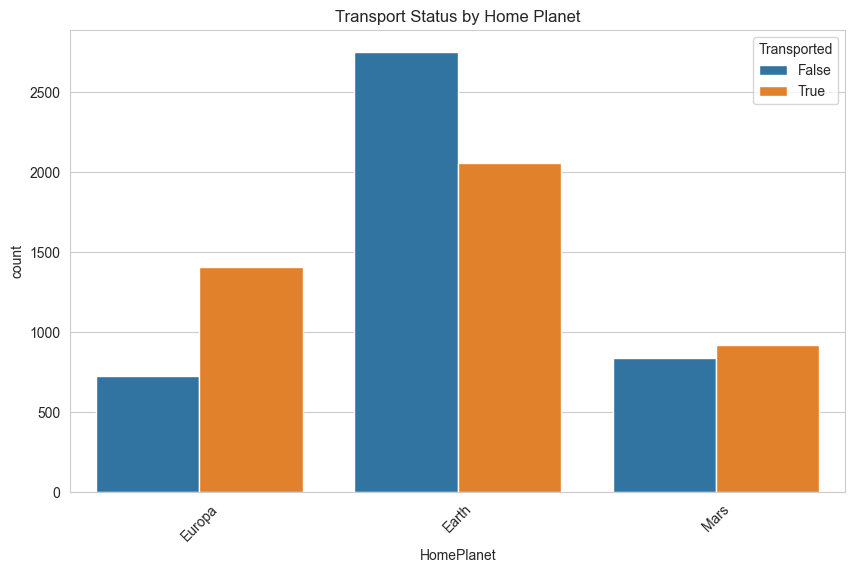

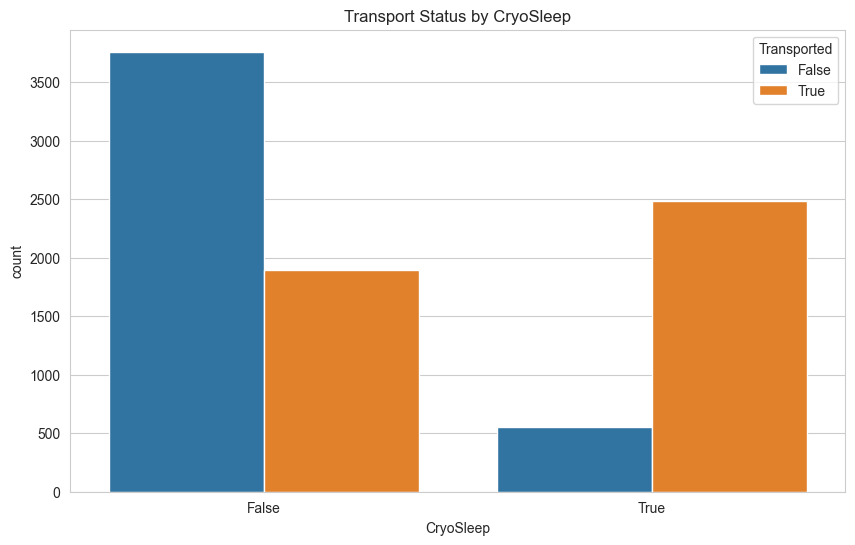

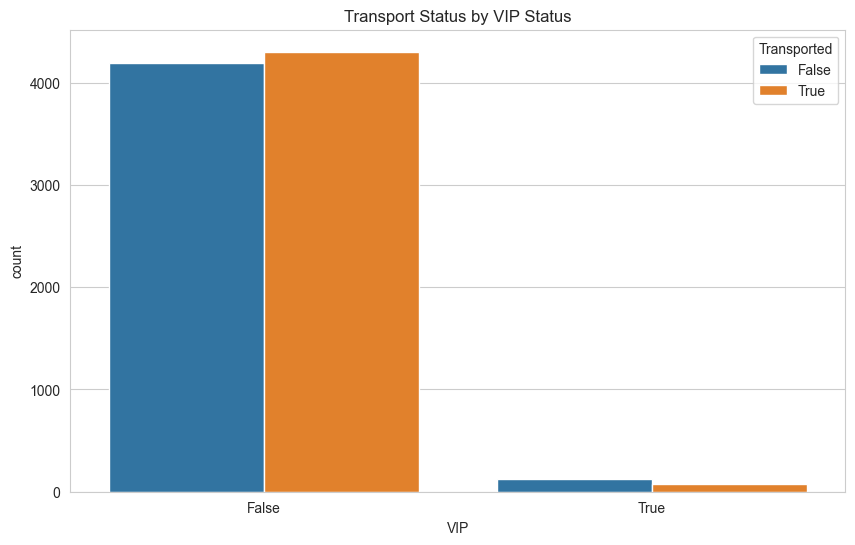

In [374]:
# Distribution of passengers by HomePlanet and Transport status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='HomePlanet', hue='Transported')
plt.title('Transport Status by Home Planet')
plt.xticks(rotation=45)
plt.show()

# CryoSleep impact
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CryoSleep', hue='Transported')
plt.title('Transport Status by CryoSleep')
plt.show()

# VIP status impact
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='VIP', hue='Transported')
plt.title('Transport Status by VIP Status')
plt.show()

In [375]:
# Now let's explore the data
print(df.info())
print(df['Transported'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   object 
 15  Num           8693 non-null   object 
 16  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(8)
memory usage: 976.4+ KB
None
Transpor

### This below approach isn't good before splitting because it creates data leakage
```# Let's say we have passenger data with 'HomePlanet' column
df = pd.DataFrame({
    'HomePlanet': [
        'Earth',    # training
        'Mars',     # training
        'Europa',   # training
        'Jupiter'   # test (new planet!)
    ]
})

# BAD APPROACH (your current code):
df['HomePlanet'] = df['HomePlanet'].astype('category').cat.codes
# Result:
# Earth   -> 0
# Mars    -> 2
# Europa  -> 1
# Jupiter -> 3  # Problem! Model "knows" about Jupiter before training

# Then when you split:
X_train = df[:3]  # Earth, Mars, Europa
X_test = df[3:]   # Jupiter```

Problems with this approach:
The encoding "sees" Jupiter before training
The model gets information it shouldn't have
In real-world, you won't know about future new planets

# GOOD APPROACH:
# 1. Split first
X_train = df[:3]  # Earth, Mars, Europa
X_test = df[3:]   # Jupiter

# 2. Encode using only training data
train_categories = pd.Categorical(X_train['HomePlanet'])
X_train['HomePlanet'] = train_categories.codes
# Result:
# Earth   -> 0
# Mars    -> 2
# Europa  -> 1

# 3. Apply same encoding to test
X_test['HomePlanet'] = pd.Categorical(
    X_test['HomePlanet'], 
    categories=train_categories.categories
).codes
# Result:
# Jupiter -> -1 (or NaN)  # Correct! Model knows this is an unknown planet

Think of it like a student taking an exam:
Bad approach: Student sees all questions (including test) before studying
Good approach: Student studies from training material, then faces new questions in test

In [376]:
# # Let's convert the categorical variables manually
# for col in df.select_dtypes(include='object').columns:
#     df[col] = df[col].astype('category').cat.codes

    


In [377]:
# Now let's handle the boolean columns
boolean_cols = ['CryoSleep', 'VIP', 'Transported']

for col in boolean_cols:
    df[col] = df[col].astype(int)


In [378]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [379]:
# define the features and target
X = df.drop(['Transported', "PassengerId"], axis=1)
y = df['Transported']


In [380]:
## handle imbalanced dataset
print("Class distribution before balancing:")
print(y.value_counts())


Class distribution before balancing:
Transported
1    4378
0    4315
Name: count, dtype: int64


In [381]:
(4378 / 8693) * 100


50.362360519958585

In [382]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [383]:
# For each categorical column
for col in X_train.select_dtypes(include='object').columns:
    # Fit encoder on training data
    train_categories = pd.Categorical(X_train[col])
    
    # Transform train data
    X_train[col] = train_categories.codes
    
    # Transform test data using training data categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories.categories).codes

In [384]:
X_train.value_counts()
# y_test.value_counts()


HomePlanet  CryoSleep  Cabin  Destination  Age   VIP  RoomService  FoodCourt  ShoppingMall  Spa     VRDeck  Name  Deck  Num   Side
0           0          0      2            39.0  0    0.0          2344.0     0.0           65.0    6898.0  761   0     0     0       1
1           0          926    0            30.0  0    0.0          787.0      116.0         1924.0  2.0     5610  3     202   1       1
                       988    2            46.0  0    0.0          3477.0     0.0           1.0     5543.0  2816  3     723   1       1
                       973    2            35.0  0    0.0          725.0      3415.0        0.0     1.0     4120  3     605   1       1
                       963    2            38.0  0    0.0          93.0       0.0           0.0     7303.0  5403  3     496   1       1
                                                                                                                                     ..
0           0          4826   2            50.0  0   

### Let's use  random forest, decision tree, k-means, hyperparameter tuning and cross validation to train the model


In [385]:
## Undersampling using sklearn

undersampler  = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)





In [386]:
y_train_undersampled.value_counts()


Transported
0    3452
1    3452
Name: count, dtype: int64

In [387]:
# oversampling using imblearn

oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


In [388]:
y_train_oversampled.value_counts()


Transported
1    3502
0    3502
Name: count, dtype: int64

In [389]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [390]:
y_train_smote.value_counts()


Transported
1    3502
0    3502
Name: count, dtype: int64

In [391]:
# knn=KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors=5) # default k is 5


In [392]:
# perform stratified kfold cross validation

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []


In [393]:

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]


    knn.fit(X_train_fold, y_train_fold) # model 
    y_pred = knn.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))




In [394]:
print("\nKNN Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")
np



KNN Results:
Accuracy: 0.7483 +/- 0.0039
Precision: 0.7347 +/- 0.0032
Recall: 0.7773 +/- 0.0048
F1 Score: 0.7554 +/- 0.0040


<module 'numpy' from 'c:\\Users\\foort\\Miniconda3\\envs\\py39_env\\lib\\site-packages\\numpy\\__init__.py'>

In [395]:
# Svm 

svm = SVC(kernel='rbf', probability=True)

# Perform stratified kfold cross validation
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    svm.fit(X_train_fold, y_train_fold)
    y_pred = svm.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))


In [396]:

print("SVM Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")



SVM Results:
Accuracy: 0.7751 +/- 0.0054
Precision: 0.7214 +/- 0.0045
Recall: 0.8963 +/- 0.0061
F1 Score: 0.7994 +/- 0.0049


In [397]:
### Naive Bayes
nb = GaussianNB()

# perform stratified kfold cross validation
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    nb.fit(X_train_fold, y_train_fold)
    y_pred = nb.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))


print("Naive Bayes Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")


Naive Bayes Results:
Accuracy: 0.7080 +/- 0.0037
Precision: 0.6461 +/- 0.0017
Recall: 0.9198 +/- 0.0078
F1 Score: 0.7590 +/- 0.0038


In [398]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index],X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))



In [399]:
print("\nDecision Tree Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")



Decision Tree Results:
Accuracy: 0.7316 +/- 0.0092
Precision: 0.7291 +/- 0.0082
Recall: 0.7370 +/- 0.0123
F1 Score: 0.7330 +/- 0.0099


In [400]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []


for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))

In [401]:
print("\nRandom Forest Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")



Random Forest Results:
Accuracy: 0.7944 +/- 0.0018
Precision: 0.8097 +/- 0.0060
Recall: 0.7698 +/- 0.0047
F1 Score: 0.7892 +/- 0.0009


In [402]:
#Compare all models
def evaluate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Create dictionary of models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
results= []
for name, model in models.items():
     mean_score, std_score = evaluate_model(model, X_train_smote, y_train_smote, cv=3)
     results.append({
        'Model': name,
        'Mean Accuracy': mean_score,
        'Std Dev': std_score
     })


# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
           Model  Mean Accuracy   Std Dev
0            KNN       0.742435  0.009869
1            SVM       0.772701  0.000545
2    Naive Bayes       0.707311  0.005478
3  Decision Tree       0.734581  0.003783
4  Random Forest       0.793547  0.005464


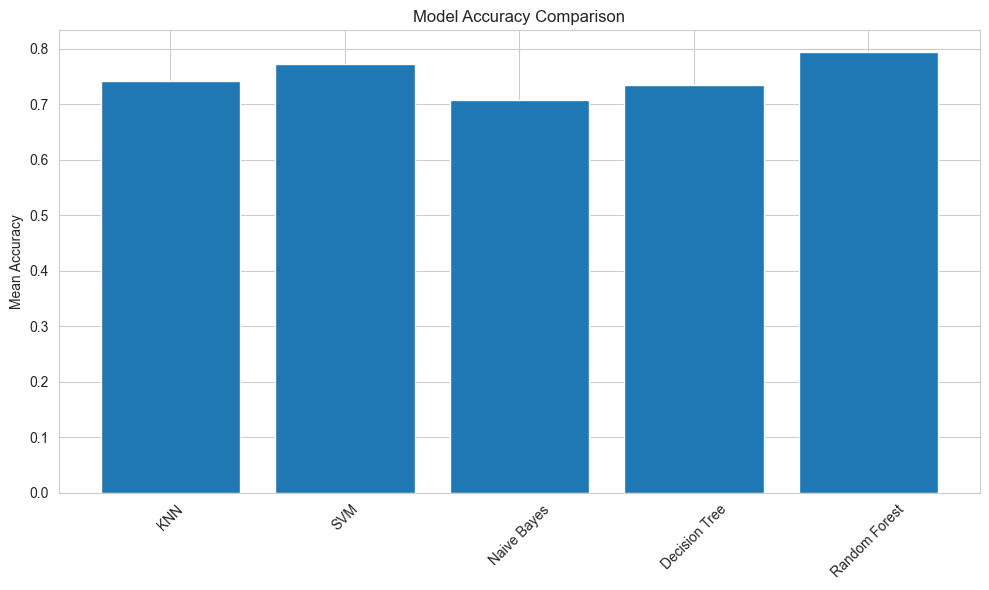

In [403]:
# Visualize model comparison
plt.figure(figsize=(10,6))
plt.bar(comparison_df['Model'], comparison_df['Mean Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Mean Accuracy')
plt.tight_layout()
plt.show()

In [404]:
### Final prediction and evaluation on test set

# using smote


final_model = SVC(kernel='rbf', probability=True)
final_model.fit(X_train_smote, y_train_smote)

print("Final model evaluation on test set using smote:")
print(classification_report(y_test, final_model.predict(X_test)))



Final model evaluation on test set using smote:
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       863
           1       0.64      0.94      0.76       876

    accuracy                           0.71      1739
   macro avg       0.76      0.70      0.69      1739
weighted avg       0.76      0.71      0.69      1739



[[394 469]
 [ 54 822]]


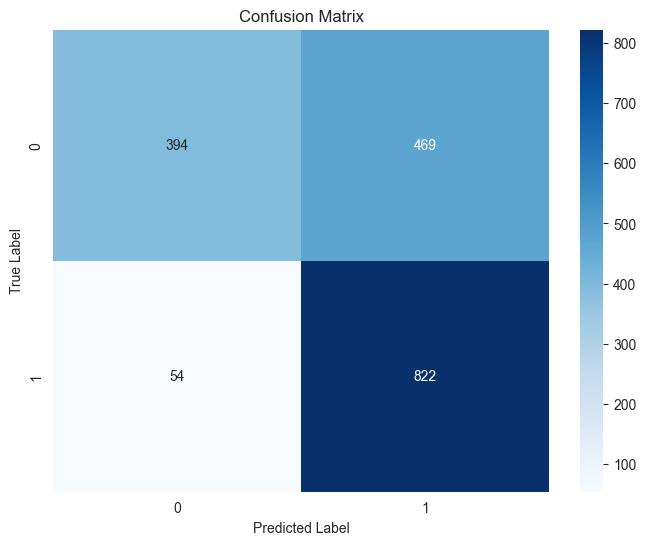

In [405]:
# 1. Make predictions on test set
y_pred = svm.predict(X_test)  # Make sure to use X_test, not X_val_fold

# 2. Now create confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# 3. For better visualization, you can add:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()